# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## What is the True Normal Human Body Temperature?
**Background**

The mean normal body temperature was held to be 37 ∘ C or 98.6 ∘ F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In [1]:
# Import all the tools that might be needed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import math
from scipy import stats
from statsmodels.stats import weightstats as stests


df = pd.read_csv('data/human_body_temperature.csv')
sns.set()

## Q1. Is the distribution of body temperatures normal?
* Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
* Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

#### Going to first get a general idea about the data that we have.

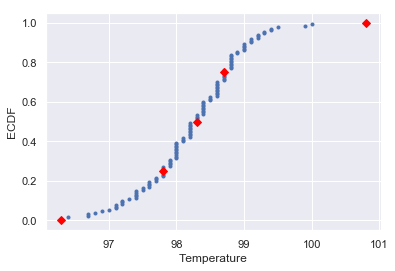

In [2]:
df.describe()
df.info
df.shape
df.head(5)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n   # np.arange: end value not iunclusive
    
    return x, y
    
x, y = ecdf(df.temperature)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Temperature')
plt.ylabel('ECDF')
percentiles = np.array([0, 25, 50, 75, 100])
temp_percentile = np.percentile(df.temperature, percentiles)
plt.plot(temp_percentile, percentiles/100, marker='D', color='red',linestyle = 'none');


#### Now going to check if our sample meets conditions of CLT:
* General Idea: Regardless of the population distribution model, as the sample size increases, the sample mean tends to be normally distributed around the population mean, and its standard deviation shrinks as n increases.


* CLT Conditions ( Independent Samples Test ):
    1. “Randomization”: 
        * Each sample should represent a random sample from the population, or at least follow the population distribution.
    
    2. “10% Rule”: 
        * The sample size must not be bigger than 10% of the entire population. (If no bootstraping when sampling)

    3. Large Enough Sample Size ( a or b ): 
        * a. Sample size n should be large enough so that np≥10 and nq≥10
        * b. The sample size must be sufficiently large. In general a sample size of 30 is considered sufficient 



In [3]:
entire_population_1992 = 5460000000
print(130 < entire_population_1992 * 0.1)
print(len(df.temperature) > 30)

True
True


#### From the data source, we learnt that the sample are randomly chosen, and with other two conditions meet. We can state that from CLT, our sample is nomally distributed. If we assume the sample is used as a representative of the population, then we can claimed that the distribution of body temperatures is normal.

#### Now, going to use graphs to check if our distribution is normal 

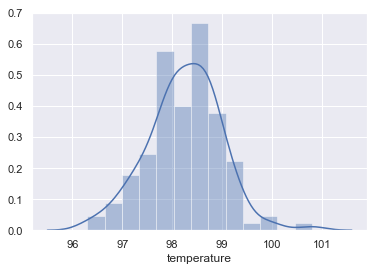

In [4]:
sns.distplot(df.temperature);

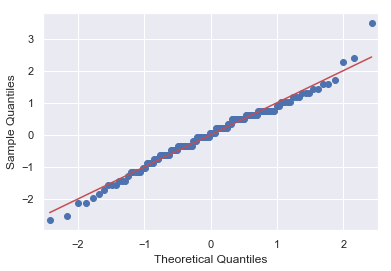

In [5]:
from statsmodels.graphics.gofplots import qqplot

normalized_temp = ((df.temperature - np.mean(df.temperature)) / np.std(df.temperature))
qqplot(normalized_temp, line='s')
plt.show()

#### From the two plots, the distribution of our sample seems to be normal, now I am going perform normality test to double-checked if sample of our test is normally distributed.
* The hypothesis of our test ( a = 0.05 ):
    * H0: Human body temperatures of our sample are normally distributed
    * H1: Human body temperatures of our sample are not normally distributed

In [6]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

#### since the p-value of the normality test is > 0.05, we cannot reject that human body temperatures of our sample are normally distributed

## Q2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

#### The sample size is not large as a fraction of all human beings. However, it is large enough for the Central Limit Theorem to apply. From the CLT conditions check above, we can say that the sample size is enough and the observations are independent ( 10% rule means that the previous draw will not affect the next draw without replacement, and knowing the outcome of one sample would provide no information about another sample ).

## Is the true population mean really 98.6 degrees F?
* First, try a bootstrap hypothesis test.
    * Hypotheses:
        * H0: population mean = 98.6$^{\circ}$F
        * H1: population mean ≠ 98.6$^{\circ}$F

In [7]:
# To draw a bootstrap replicate
def bs_replicates_for_1D(data, func):
    return func(np.random.choice(data, size=len(data)))

# To draw n bootstrap replicates
def draw_bs_replicates(data, func, size=1):
    """Draw Bootstrap Replicates"""
    bs_replicates = np.empty(shape=size)
    
    for i in range(size):
        bs_replicates[i] = bs_replicates_for_1D(data, func)
        
    return bs_replicates

ten_k_draw = draw_bs_replicates(df.temperature, np.mean, 10000)

p_value = np.sum(ten_k_draw >= 98.6) / 10000

print('Mean: ' + str(np.mean(ten_k_draw)))
print('p-value: {}'.format(p_value))

Mean: 98.24958023076923
p-value: 0.0


#### With p-value = 0, we reject the null hypothesis that mean human body temperature = 98.6$^{\circ}$F, the mean is 98.25$^{\circ}$F

* Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

#### When comparing mean of single sample to the mean of population, one-sample test is appropriate.

* In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?

### Z-stat:
* 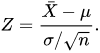

### T-stat:
* 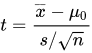

#### We can tell from the 2 equations above that t-statistic is the one we are going to use here, since we do not know the standard deviation of the population, we only have standard error from our sample. However, t-stat will approach the result of the z-stat if n is => 30. I am going to guess the result of using these 2 methods is going to be the same.

In [8]:
t_stat = stats.ttest_1samp(df.temperature, 98.6)
print("t-score: "'{0:.20f}'.format(t_stat.statistic))
print("t-test p-value: "'{0:.20f}'.format(t_stat.pvalue))

t-score: -5.45482329236451946031
t-test p-value: 0.00000024106320415561



* Now try using the other test. How is the result be different? Why?

In [9]:
def z_score(data, u):
    return (np.mean(data) - u) / ((np.std(data)) / ((len(data))**(0.5)))

z = z_score(df.temperature, 98.6)
print("z_score: " + str(z))
stats.norm.cdf(z)
print("z-test_p-value: "'{0:.20f}'.format(stats.norm.cdf(z)))

z_score: -5.475925202078116
z-test_p-value: 0.00000002176157582941


#### The result of these two test is approximately the same as predict, since when n => 30, t-stats will approach the result of z-stats

## Q4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

#### The only different here is the sample size, since we still don't know the population stadard deviation, t-stats is the correct one to use.

In [10]:
ten_sample = np.random.choice(df.temperature, size=10)

t_stats_10 = stats.ttest_1samp(ten_sample, 98.6)
print("t-score: "'{0:.20f}'.format(t_stats_10.statistic))
print("t-test p-value: "'{0:.20f}'.format(t_stats_10.pvalue))

t-score: -2.08834843664818547992
t-test p-value: 0.06636084787652592187


#### Since the sample size is really small, the different of between result of t-stats is reall different from result of z-test.

In [11]:
z_ten = z_score(ten_sample, 98.6)
print("z_score: " + str(z_ten))
stats.norm.cdf(z_ten)
print("z-test_p-value: "'{0:.20f}'.format(stats.norm.cdf(z_ten)))

z_score: -2.201312535953373
z-test_p-value: 0.01385695300890220881


#### From the result above, we cannot reject the null hypothsis when sample size = 10

## Q5. At what temperature should we consider someone's temperature to be "abnormal"?
* As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
* Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [12]:
# Do not know how to perform a a bootstrap here for confidence interval, since only need one draw 

In [13]:
mean_temp = np.mean(df.temperature)
std_temp = np.std(df.temperature)
CI_low, CI_high = stats.norm.interval(0.95, loc=mean_temp, scale=std_temp)
print("Confidence Interval: " + str(CI_low) + ", " + str(CI_high))
print("Margin of error: +/- " + str(mean_temp - CI_low))


Confidence Interval: 96.81775582674824, 99.68070571171332
Margin of error: +/- 1.431474942482538


#### With the mean = 98.25$^{\circ}$F with a 95% Confidence Interval, temperature below 96.81$^{\circ}$F and temperature above 99.68$^{\circ}$F, will be consider abnormal.

## Q6. Is there a significant difference between males and females in normal temperature?
* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.

#### Since we are comparing if the mean of two samples are different from each other, independent t-test will be the test we use here.

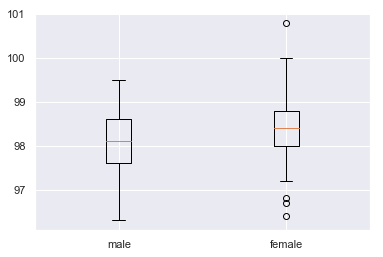

In [14]:
df.gender.value_counts()
male = df[df.gender == "M"]
female = df[df.gender == "F"]
x = [male.temperature, female.temperature]
plt.boxplot(x, labels=['male', 'female']);

NormaltestResult(statistic=0.8911999666950503, pvalue=0.6404399074569123)

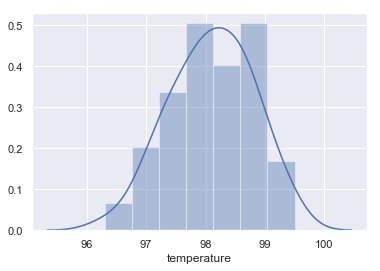

In [15]:
sns.distplot(male.temperature);
stats.normaltest(male.temperature)

NormaltestResult(statistic=4.735438112908399, pvalue=0.09369419389856404)

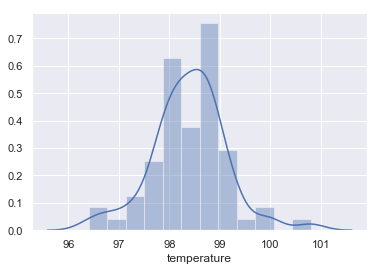

In [16]:
sns.distplot(female.temperature);
stats.normaltest(female.temperature)

In [17]:
print(np.var(male.temperature))
print(np.var(female.temperature))

0.4807479289940825
0.5442698224852062


#### From the boxplot above, we can see that the mean temperature of female is slightly higher than male, and both male and female samples are normally distributed. However, the variance of two groups are different from each other, a Welch t Test statistic is the test we are going to perform here. 
* H0: mean of male temperature = mean of female temperature
* H1: mean of male temperature ≠ mean of female temperature

In [18]:
stats.ttest_ind(female.temperature, male.temperature, axis=0, equal_var=False)

Ttest_indResult(statistic=2.285434538165611, pvalue=0.023938264182934196)

#### From the result of Welch t Test statistic, we reject null hypothesis and accept the alternative,  male and female mean body temperatures are different.

## Extra: Checking if there exist any correlation between heart rate and body temperature

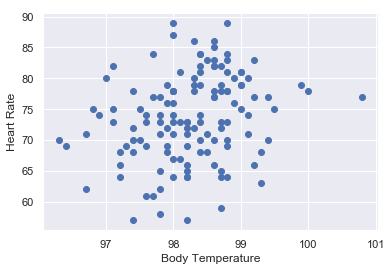

In [19]:
plt.scatter(x=df.temperature, y=df.heart_rate, marker=None);
stats.pearsonr(df.temperature, df.heart_rate);
plt.xlabel("Body Temperature");
plt.ylabel("Heart Rate");

#### With a correlation of 0.25 between heart rate and temperature, I can only said that these two variables are postively weak correlated

## Extra: 2.6 Were the Original Temperatures Taken on a Centigrade or Fahrenheit Scale?

12 One can introduce this question by asking students whether there is anything unusual about the distribution of temperatures. If students plot the distribution as a histogram with as many categories as possible (each category representing 0.1 degrees F), they will note that there is a periodic rise and fall within the overall normal curve. This occurs around every other category, or about every 0.2 degrees F. Perhaps this is an artifact of rounding, yet it would make little sense to round off at about every 0.2 degrees F. However, if the temperatures had been converted from a Centigrade scale, we would find the periodic rise at every 0.1 degrees Centigrade (because degrees C = (degrees F - 32) * 5/9). This makes more sense -- there would be a tendency to round to the nearest tenth of a degree. Another indication of this is the fact that in the original article, all temperatures are given first in degrees Centigrade, then converted to Fahrenheit.

